# ECS7024 Statistics for Artificial Intelligence and Data Science

## Coursework 3 : Aims and Outline

The overall aim of this notebook is to carry out an exploratory analysis of prices in different areas over 36 months in different regions. Investigating whether change in area price has affected all the regions similarly. This notebook also show ways of visualizing and comparing area prices at different times. We will also explore merging of two data frames and how to deal with the missing values.

 1. Part 1: Load and prepare the data
     1. Separating region data from area data.
     1. Adding Region Name to each area.
     1. Handling missing values, description & justification
     
 2. Part 2: Trends
     1. Trends of different region (Detached & flat prices)
     1. Comments on trends of flats and detached property prices.
     1. Variety of Plots 
     
 3. Part 3: Price Change
     1. Computing change in price and comments (July 2017 & July 2018)
     1. Visualize the change in area prices in each region.
     
 4. Part 4: Statistical Analysis
     1. Areas Prices (Increasing / Decreasing)
     1. Cross-tabulate the number of areas 
     1. Chi-square test.
     1. Interpretation of results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Part 1 - Load and prepare the data

The file average-property-price.csv has information about the average price of 
properties (there are 4 types of properties) over 36 months in different areas of the country. The Area Codes are defined by the Office for National Statistics (ONS) and reflect the hierarchy of government in the UK.

In [2]:
# Loading 'average-property-price' data set
df = pd.read_csv('average-property-price.csv')
df

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5755,01/04/2019,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
5756,01/05/2019,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
5757,01/06/2019,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830
5758,01/07/2019,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990


### Assigning month column

In [3]:
# Adding month column abd dropping date column
df1 = df.assign(Month = pd.to_datetime(df['Date'], dayfirst=True)).drop(labels='Date', axis=1)
df1

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


### Part 1.1 - Separating the region data from area data (with ‘E12’ prefix codes)

In [4]:
# Separating region data Start with prefix 'E12'
Region_data = df1.loc[df1.Code.str.startswith('E12')]
Region_data

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01
...,...,...,...,...,...,...,...
5755,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010,2019-04-01
5756,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930,2019-05-01
5757,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830,2019-06-01
5758,South West,E12000009,403181.9431,263254.4633,215997.91970,166733.18990,2019-07-01


### Area data  (with ‘other’ prefix codes)

In [5]:
# Area data frame with prefixes other than E12
Area_data = df.loc[df.Code.str.startswith('E12') == False]
Area_data

,Date,Area,Code,Detached,Semi,Terraced,Flat
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795
...,...,...,...,...,...,...,...
5431,01/04/2019,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830
5432,01/05/2019,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010
5433,01/06/2019,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920
5434,01/07/2019,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220


### loading 'Location codes' data file

In [6]:
# Loading location-codes data set
location = pd.read_csv('location-codes.csv')

# Rename 'AuthorityName column' to Code for merging purpose
location_codes = location.rename({'AuthorityCode':'Code'},axis=1)
location_codes

,Code,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East
...,...,...,...,...
149,E10000029,Suffolk,E12000006,East of England
150,E10000030,Surrey,E12000008,South East
151,E10000031,Warwickshire,E12000005,West Midlands
152,E10000032,West Sussex,E12000008,South East


### Part 1.2 - Merging ( Adding RegionName to each area)

Use the ‘location code’ data file to add to each area price record the region to which 
the area belongs.

In [7]:
# Merge for adding region name to each area
merge = Area_data.merge(location_codes, how='inner', on='Code')
merge

,Date,Area,Code,Detached,Semi,Terraced,Flat,AuthorityName,RegionCode,RegionName
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,Hartlepool,E12000001,North East
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,Hartlepool,E12000001,North East
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,Hartlepool,E12000001,North East
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,Hartlepool,E12000001,North East
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,Hartlepool,E12000001,North East
...,...,...,...,...,...,...,...,...,...,...
5431,01/04/2019,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,Worcestershire,E12000005,West Midlands
5432,01/05/2019,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,Worcestershire,E12000005,West Midlands
5433,01/06/2019,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,Worcestershire,E12000005,West Midlands
5434,01/07/2019,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,Worcestershire,E12000005,West Midlands


### Part 1.3 - Missing values (Area data)

In [8]:
# Counting missing values
merge.isna().sum()

Date              0
Area              0
Code              0
Detached         36
Semi             36
Terraced         20
Flat              0
AuthorityName     0
RegionCode        0
RegionName        0
dtype: int64

### Description and justification on missing values

- Description : There are total 92 missing values in Area data frame. Column 'Detached' is having 36, column 'Semi' has 36 and column'Terraced' has 20 missing values respectively. However, if the dataset is relatively small, every data point counts. In these situations, a missing data point means loss of valuable information. In any case, missing data creates imbalanced observations, cause biased estimates, and in extreme cases, can even lead to invalid conclusions.

 - Act : We can replace these missing values by linear interpolation to estimate a missing value in the same increasing order from previous values. Linear interpolation is an imputation technique that assumes a linear relationship between data points and utilises non-missing values from adjacent data points to compute a value for a missing data point.
 
 
- Justification : The cause of missing values can be data corruption or failure to record data. The handling of missing data is very important during the preprocessing of the dataset as many machine learning algorithms do not support missing values. We can use linear interplation method or mean value to replace the missing values in case the data distribution is symmetric. Consider using median or mode with skewed data distribution.

### Replacing missing values

In [9]:
New_Area_data = merge.interpolate(method='linear')
New_Area_data

,Date,Area,Code,Detached,Semi,Terraced,Flat,AuthorityName,RegionCode,RegionName
0,01/09/2016,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,Hartlepool,E12000001,North East
1,01/10/2016,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,Hartlepool,E12000001,North East
2,01/11/2016,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,Hartlepool,E12000001,North East
3,01/12/2016,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,Hartlepool,E12000001,North East
4,01/01/2017,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,Hartlepool,E12000001,North East
...,...,...,...,...,...,...,...,...,...,...
5431,01/04/2019,Worcestershire,E10000034,367609.8101,223579.8115,175790.42090,129009.66830,Worcestershire,E12000005,West Midlands
5432,01/05/2019,Worcestershire,E10000034,365271.8235,222863.2382,175373.24490,128117.93010,Worcestershire,E12000005,West Midlands
5433,01/06/2019,Worcestershire,E10000034,369772.6445,225435.2225,177094.03750,129593.06920,Worcestershire,E12000005,West Midlands
5434,01/07/2019,Worcestershire,E10000034,371129.2027,225763.4806,177371.34880,129684.34220,Worcestershire,E12000005,West Midlands


In [10]:
New_Area_data.isna().sum()

Date             0
Area             0
Code             0
Detached         0
Semi             0
Terraced         0
Flat             0
AuthorityName    0
RegionCode       0
RegionName       0
dtype: int64

### Missing values (Region data)

In [11]:
# Counting missing values
Region_data.isna().sum()

Area        0
Code        0
Detached    0
Semi        0
Terraced    0
Flat        0
Month       0
dtype: int64

- There are no missing values found in Region data frame.

## Part 2 - Trends

### Part 2.1 - Trends and comments on Flats and detached property prices.

Plot trends of the prices, considering only flats and detached properties. The plots 
should cover the prices in the 9 regions over the 36 months. 

Overall comment on trend and two property types at different times will be made at the end of this part2. However, individual region trend comment is also available underneath the trend.


(Region data)

In [12]:
# Set Date as index
Region_data1 = Region_data.set_index(keys='Month')
Region_data1

,Area,Code,Detached,Semi,Terraced,Flat
Month,,,,,,
2016-09-01,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412
2016-10-01,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508
2016-11-01,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739
2016-12-01,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119
2017-01-01,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214
...,...,...,...,...,...,...
2019-04-01,South West,E12000009,392886.0520,257833.8176,211378.14160,164580.13010
2019-05-01,South West,E12000009,391955.4811,257312.3992,210797.91220,163699.89930
2019-06-01,South West,E12000009,395661.8630,259252.6985,211065.78130,165268.33830


### North East region - Flats and detached property price trends

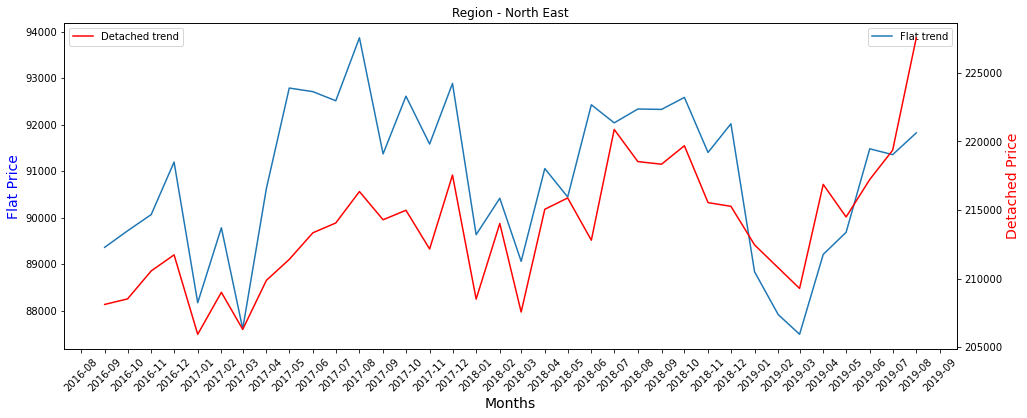

In [13]:
# Plotting trend for North East region only

Trend_1 = Region_data1.loc[(Region_data1.Area=='North East')]
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(Trend_1.loc[:,'Flat'], label='Flat trend')


a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(Trend_1.loc[:,'Detached'], color='r', label = 'Detached trend')


a1.legend()
a2.legend()
a1.set_title('Region - North East')
a1.set_ylabel('Flat Price', fontsize=14, color='b')
a2.set_ylabel('Detached Price', fontsize=14, color='r')
a1.tick_params(axis='x', labelrotation=45)
a2.tick_params(axis='x', labelrotation=45)
a1.set_xlabel('Months', fontsize=14)

import matplotlib.dates as mdates
a1.xaxis.set_major_locator(mdates.MonthLocator())

In Sep 2016, Flat type property had lower price than detached type. It starts with around 89000 pounds for flat type property whereas observed just over to 20500 pounds for detached type property on September 2016. Both property prices rose over 36 months at a significant good rate. Maximum price of flat type property observed around july 2017 whereas maximum price of detached type property observed around August 2019.

### North West region - Flats and detached property price trends

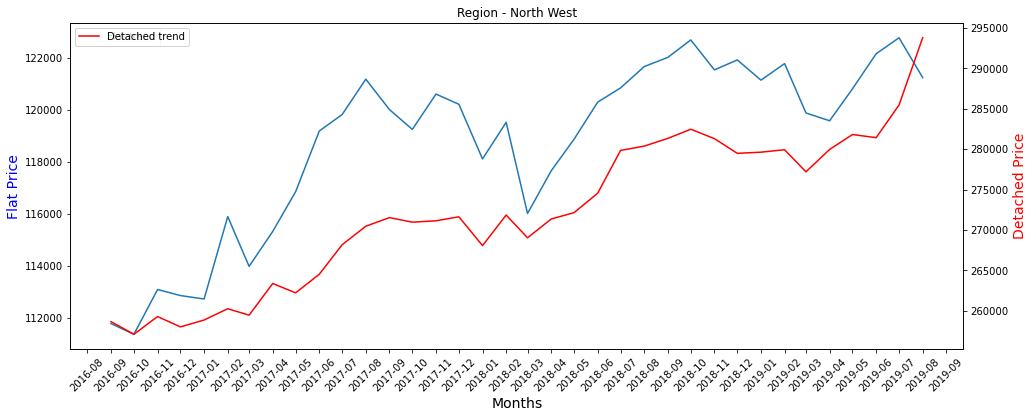

In [14]:
# Plotting trend for North West region only

Trend_2 = Region_data1.loc[(Region_data1.Area=='North West')]
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(Trend_2.loc[:,'Flat'], label='Flat trend')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(Trend_2.loc[:,'Detached'], color='r', label = 'Detached trend')


a1.legend()
a2.legend()
a1.set_title('Region - North West')
a1.set_ylabel('Flat Price', fontsize=14, color='b')
a2.set_ylabel('Detached Price', fontsize=14, color='r')
a1.tick_params(axis='x', labelrotation=45)
a2.tick_params(axis='x', labelrotation=45)
a1.set_xlabel('Months', fontsize=14)

import matplotlib.dates as mdates
a1.xaxis.set_major_locator(mdates.MonthLocator())

In Sep 2016, Flat type property had lower price than detached type. It starts with around 112000 pounds for flat type property whereas observed just over to 260000 pounds for detached type property on September 2016. Both property prices rose over 36 months at a significant good rate. Maximum price of flat type property observed around june 2019 whereas maximum price of detached type property observed around August 2019.

### Yorkshire and The Humber region - Flats and detached property price trends

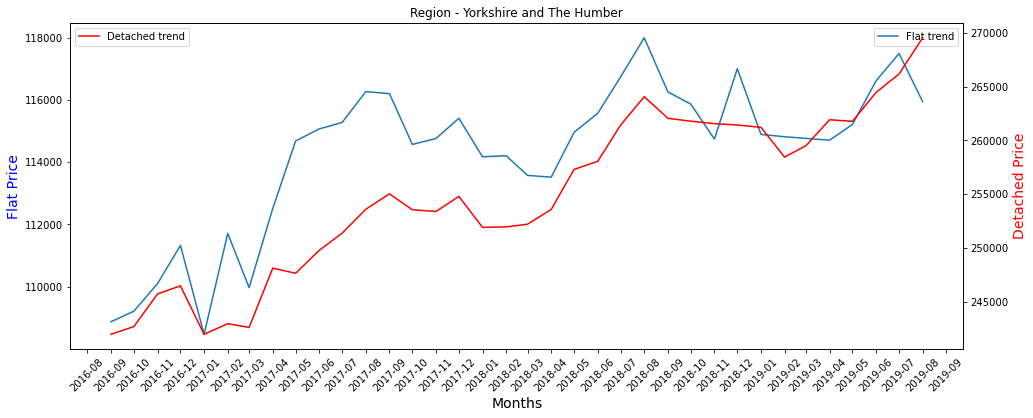

In [15]:
# Plotting trend for Yorkshire and The Humber region only

Trend_3 = Region_data1.loc[(Region_data1.Area=='Yorkshire and The Humber')]
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(Trend_3.loc[:,'Flat'], label='Flat trend')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(Trend_3.loc[:,'Detached'], color='r', label = 'Detached trend')


a1.legend()
a2.legend()
a1.set_title('Region - Yorkshire and The Humber')
a1.set_ylabel('Flat Price', fontsize=14, color='b')
a2.set_ylabel('Detached Price', fontsize=14, color='r')
a1.tick_params(axis='x', labelrotation=45)
a2.tick_params(axis='x', labelrotation=45)
a1.set_xlabel('Months', fontsize=14)

import matplotlib.dates as mdates
a1.xaxis.set_major_locator(mdates.MonthLocator())

In Sep 2016, Flat type property had lower price than detached type. It starts below 110000 pounds for flat type property whereas observed just below to 245000 pounds for detached type property on September 2016. Both property prices rose over 36 months at a significant good rate. Maximum price of flat type property observed around july 2018 whereas maximum price of detached type property observed around August 2019.

### East Midlands - Flats and detached property price trends

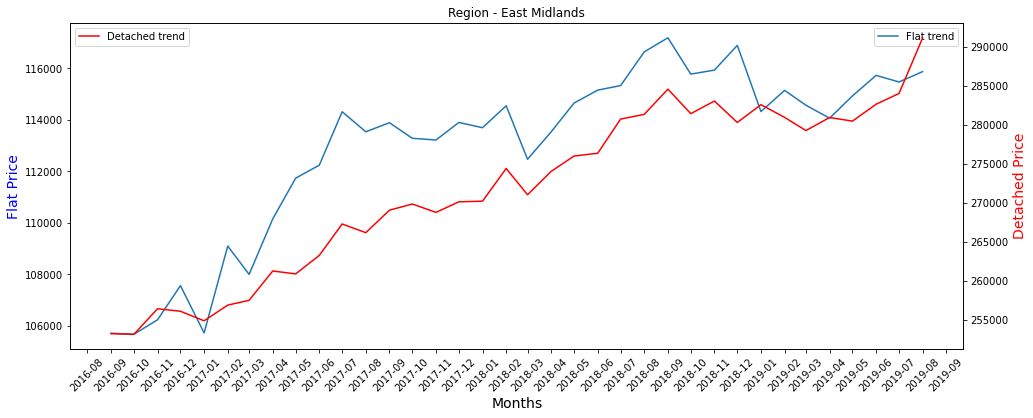

In [16]:
# Plotting trend for East Midlands region only

Trend_4 = Region_data1.loc[(Region_data1.Area=='East Midlands')]
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(Trend_4.loc[:,'Flat'], label='Flat trend')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(Trend_4.loc[:,'Detached'], color='r', label = 'Detached trend')


a1.legend()
a2.legend()
a1.set_title('Region - East Midlands')
a1.set_ylabel('Flat Price', fontsize=14, color='b')
a2.set_ylabel('Detached Price', fontsize=14, color='r')
a1.tick_params(axis='x', labelrotation=45)
a2.tick_params(axis='x', labelrotation=45)
a1.set_xlabel('Months', fontsize=14)

import matplotlib.dates as mdates
a1.xaxis.set_major_locator(mdates.MonthLocator())

In Sep 2016, Flat type property had lower price than detached type. It starts below 106000 pounds for flat type property whereas observed just below to 255000 pounds for detached type property on September 2016. Both property prices rose over 36 months at a significant good rate. Maximum price of flat type property observed around August 2018 whereas maximum price of detached type property observed around August 2019.

### West Midlands Region - Flats and detached property price trends

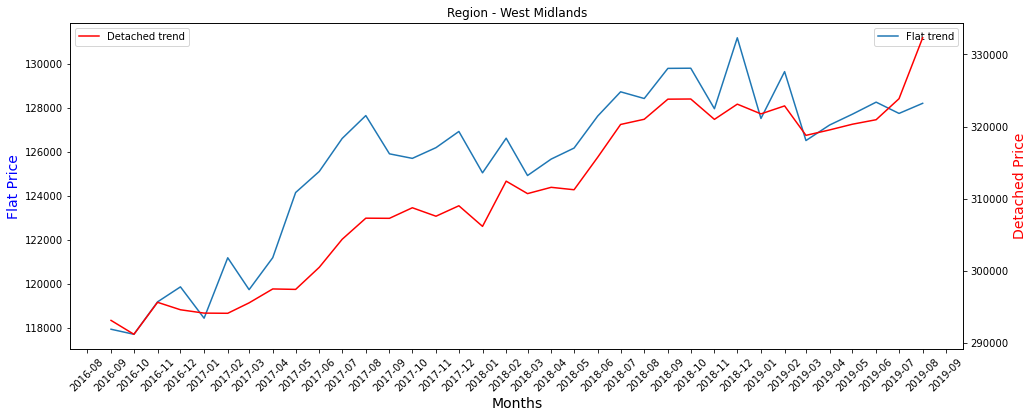

In [17]:
# Plotting trend for West Midlands region only

Trend_5 = Region_data1.loc[(Region_data1.Area=='West Midlands Region')]
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(Trend_5.loc[:,'Flat'], label='Flat trend')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(Trend_5.loc[:,'Detached'], color='r', label = 'Detached trend')


a1.legend()
a2.legend()
a1.set_title('Region - West Midlands')
a1.set_ylabel('Flat Price', fontsize=14, color='b')
a2.set_ylabel('Detached Price', fontsize=14, color='r')
a1.tick_params(axis='x', labelrotation=45)
a2.tick_params(axis='x', labelrotation=45)
a1.set_xlabel('Months', fontsize=14)

import matplotlib.dates as mdates
a1.xaxis.set_major_locator(mdates.MonthLocator())

In Sep 2016, Flat type property had lower price than detached type. It starts around 118000 pounds for flat type property whereas observed around 290000 pounds for detached type property on September 2016. Both property prices rose over 36 months at a significant good rate. Maximum price of flat type property observed around December 2018 whereas maximum price of detached type property observed around August 2019.

### East of England Region - Flats and detached property price trends

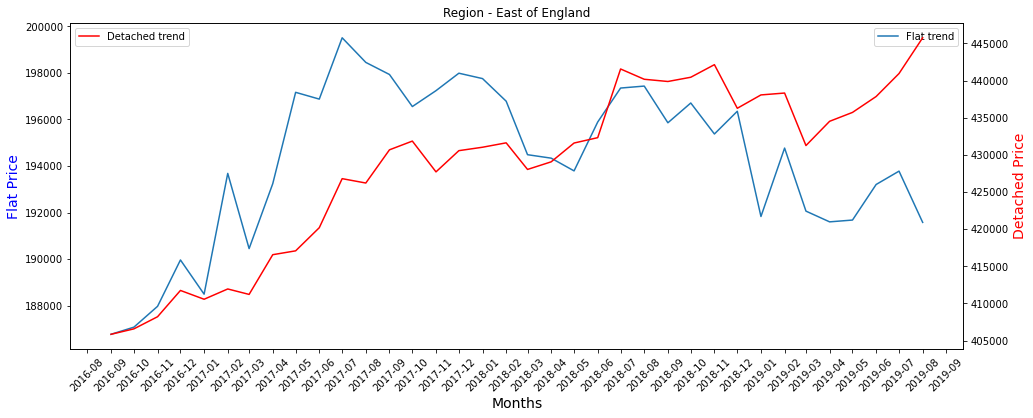

In [18]:
# Plotting trend for East of England region only

Trend_6 = Region_data1.loc[(Region_data1.Area=='East of England')]
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(Trend_6.loc[:,'Flat'], label='Flat trend')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(Trend_6.loc[:,'Detached'], color='r', label = 'Detached trend')


a1.legend()
a2.legend()
a1.set_title('Region - East of England')
a1.set_ylabel('Flat Price', fontsize=14, color='b')
a2.set_ylabel('Detached Price', fontsize=14, color='r')
a1.tick_params(axis='x', labelrotation=45)
a2.tick_params(axis='x', labelrotation=45)
a1.set_xlabel('Months', fontsize=14)

import matplotlib.dates as mdates
a1.xaxis.set_major_locator(mdates.MonthLocator())

In Sep 2016, Flat type property had lower price than detached type. It starts around 188000 pounds for flat type property whereas observed around 405000 pounds for detached type property on September 2016. Both property prices rose over 36 months at a significant good rate. Maximum price of flat type property observed around July 2017 whereas maximum price of detached type property observed around August 2019.

### London Region - Flats and detached property price trends

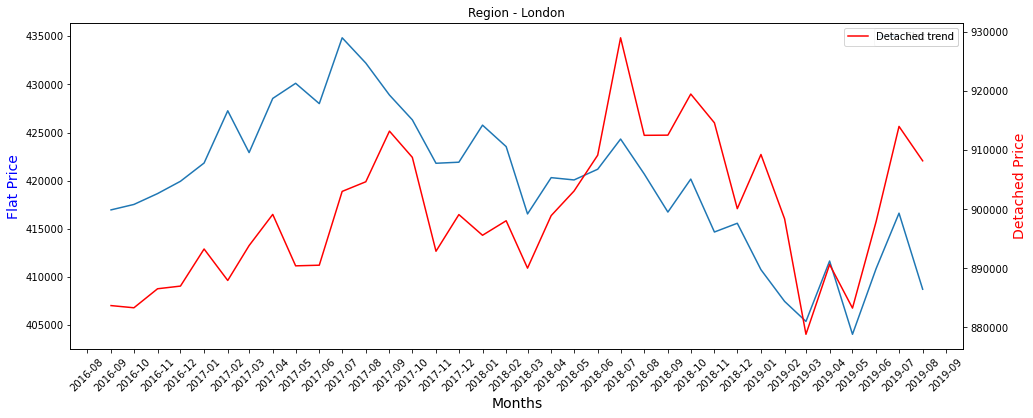

In [19]:
# Plotting trend for London region only

Trend_7 = Region_data1.loc[(Region_data1.Area=='London')]
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(Trend_7.loc[:,'Flat'], label='Flat trend')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(Trend_7.loc[:,'Detached'], color='r', label = 'Detached trend')


a1.legend()
a2.legend()
a1.set_title('Region - London')
a1.set_ylabel('Flat Price', fontsize=14, color='b')
a2.set_ylabel('Detached Price', fontsize=14, color='r')
a1.tick_params(axis='x', labelrotation=45)
a2.tick_params(axis='x', labelrotation=45)
a1.set_xlabel('Months', fontsize=14)

import matplotlib.dates as mdates
a1.xaxis.set_major_locator(mdates.MonthLocator())

In Sep 2016, Flat type property had lower price than detached type. It starts around 415000 pounds for flat type property whereas observed around 880000 pounds for detached type property on September 2016. Only detached property prices rose over 36 months at a significant good rate and flat property prices fallen over time. Maximum price of flat type property observed around july 2017 whereas maximum price of detached type property observed around july 2018.

### South East Region - Flats and detached property price trends

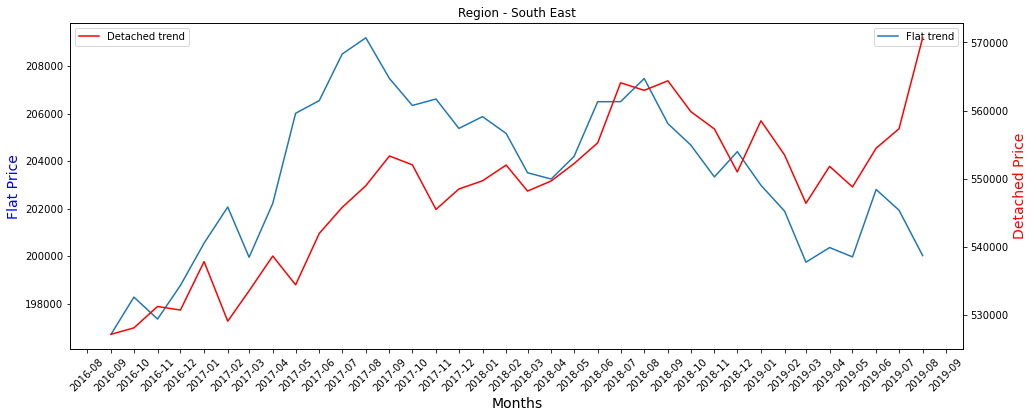

In [20]:
# Plotting trend for South East region only

Trend_8 = Region_data1.loc[(Region_data1.Area=='South East')]
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(Trend_8.loc[:,'Flat'], label='Flat trend')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(Trend_8.loc[:,'Detached'], color='r', label = 'Detached trend')


a1.legend()
a2.legend()
a1.set_title('Region - South East')
a1.set_ylabel('Flat Price', fontsize=14, color='b')
a2.set_ylabel('Detached Price', fontsize=14, color='r')
a1.tick_params(axis='x', labelrotation=45)
a2.tick_params(axis='x', labelrotation=45)
a1.set_xlabel('Months', fontsize=14)

import matplotlib.dates as mdates
a1.xaxis.set_major_locator(mdates.MonthLocator())

In Sep 2016, Flat type property had lower price than detached type. It starts around 198000 pounds for flat type property whereas observed around 530000 pounds for detached type property on September 2016. Both property prices rose over 36 months at a significant good rate. Maximum price of flat type property observed around july 2017 whereas maximum price of detached type property observed around August 2019.

### South West Region - Flats and detached property price trends

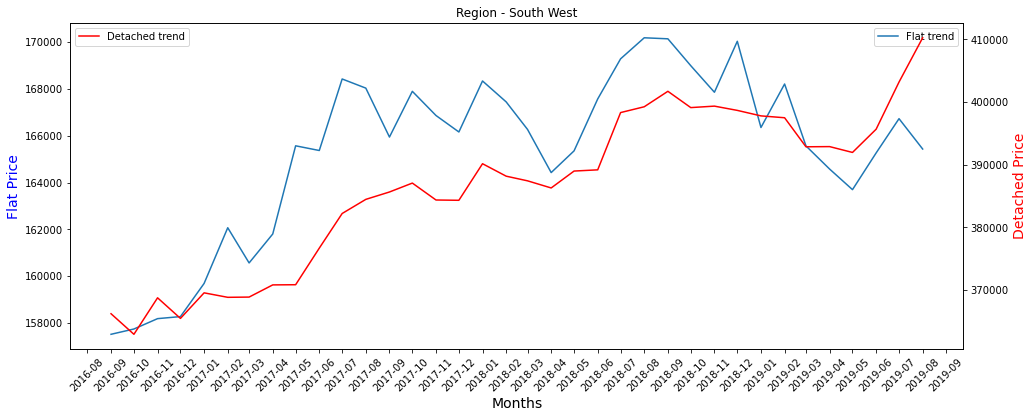

In [21]:
# Plotting trend for South West region only

Trend_9 = Region_data1.loc[(Region_data1.Area=='South West')]
fig, a1 = plt.subplots(1, 1, figsize=(16, 6))
a1.plot(Trend_9.loc[:,'Flat'], label='Flat trend')

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis
a2.plot(Trend_9.loc[:,'Detached'], color='r', label = 'Detached trend')


a1.legend()
a2.legend()
a1.set_title('Region - South West')
a1.set_ylabel('Flat Price', fontsize=14, color='b')
a2.set_ylabel('Detached Price', fontsize=14, color='r')
a1.tick_params(axis='x', labelrotation=45)
a2.tick_params(axis='x', labelrotation=45)
a1.set_xlabel('Months', fontsize=14)

import matplotlib.dates as mdates
a1.xaxis.set_major_locator(mdates.MonthLocator())

In Sep 2016, Flat type property had lower price than detached type. It starts around 158000 pounds for flat type property whereas observed around 370000 pounds for detached type property on September 2016. Both property prices rose over 36 months at a significant good rate. Maximum price of flat type property observed around August 2018 whereas maximum price of detached type property observed around August 2019.

### Part 2.2 Overall Comments - Comparing regions, two property types at different times 

London is the most costly region among all regions. Flat prices fell down in london region only among all regions. It means people prefer to live in detached type property in london region as compared to flat type property. Whereas flat property prices observed a growth in price in other regions except London. Secondly, North East is the most affordable and cheapest region to live.

North West,East midlands and West midlands has highest percentage of price growth for flat and detached property among all other regions. Percentage of price growth recorded high in detached type property than flat type. Detached property are also costlier than flat type property in all regions. 

flat and detached type property has highest price in London region. For detached & flat type property, North East region is the cheapest option to live in terms of price.

### Part 2.3 Variety of plots ( Group by year) - Flat type property

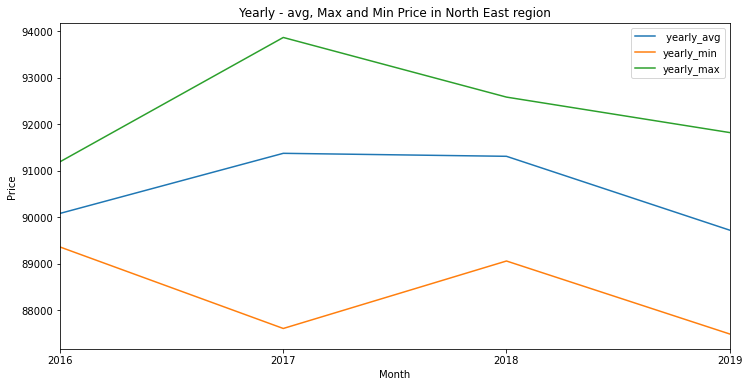

In [22]:
Yearly = Region_data1.loc[(Region_data1.Area=='North East')]
Yearly = Yearly['Flat']

yearly_avg = Yearly.groupby(pd.Grouper(freq='Y')).mean()
yearly_min = Yearly.groupby(pd.Grouper(freq='Y')).min()
yearly_max = Yearly.groupby(pd.Grouper(freq='Y')).max()

a1 = yearly_avg.plot(ylabel='Price',title= 'Yearly - avg, Max and Min Price in North East region',figsize=(12,6))
a2= yearly_min.plot()
yearly_max.plot()
a1.legend([' yearly_avg', 'yearly_min', 'yearly_max'])

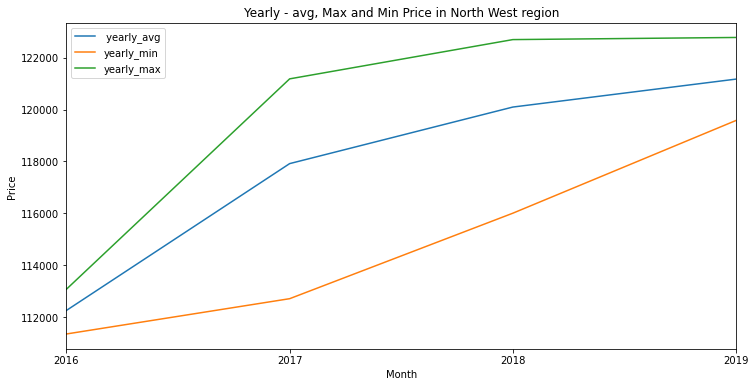

In [23]:
Yearly = Region_data1.loc[(Region_data1.Area=='North West')]
Yearly = Yearly['Flat']

yearly_avg = Yearly.groupby(pd.Grouper(freq='Y')).mean()
yearly_min = Yearly.groupby(pd.Grouper(freq='Y')).min()
yearly_max = Yearly.groupby(pd.Grouper(freq='Y')).max()

a1 = yearly_avg.plot(ylabel='Price',title= 'Yearly - avg, Max and Min Price in North West region',figsize=(12,6))
a2= yearly_min.plot()
yearly_max.plot()
a1.legend([' yearly_avg', 'yearly_min', 'yearly_max'])

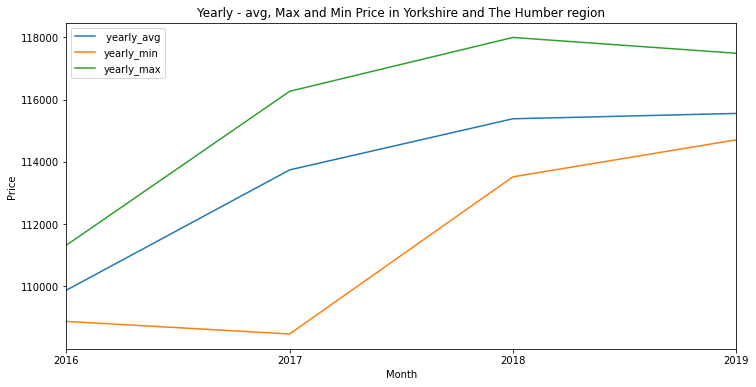

In [24]:
Yearly = Region_data1.loc[(Region_data1.Area=='Yorkshire and The Humber')]
Yearly = Yearly['Flat']

yearly_avg = Yearly.groupby(pd.Grouper(freq='Y')).mean()
yearly_min = Yearly.groupby(pd.Grouper(freq='Y')).min()
yearly_max = Yearly.groupby(pd.Grouper(freq='Y')).max()

a1 = yearly_avg.plot(ylabel='Price',title= 'Yearly - avg, Max and Min Price in Yorkshire and The Humber region',figsize=(12,6))
a2= yearly_min.plot()
yearly_max.plot()
a1.legend([' yearly_avg', 'yearly_min', 'yearly_max'])

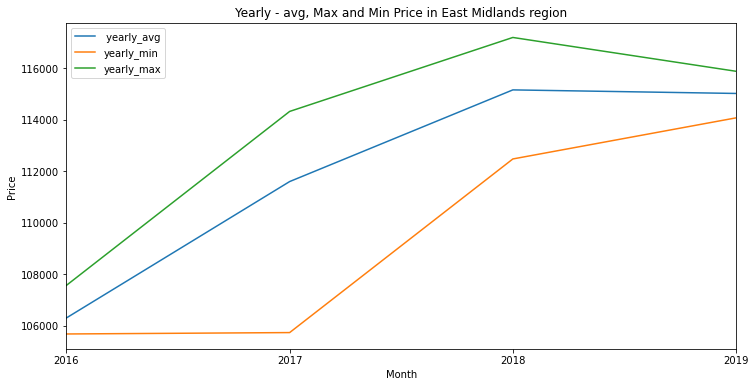

In [25]:
Yearly = Region_data1.loc[(Region_data1.Area=='East Midlands')]
Yearly = Yearly['Flat']

yearly_avg = Yearly.groupby(pd.Grouper(freq='Y')).mean()
yearly_min = Yearly.groupby(pd.Grouper(freq='Y')).min()
yearly_max = Yearly.groupby(pd.Grouper(freq='Y')).max()

a1 = yearly_avg.plot(ylabel='Price',title= 'Yearly - avg, Max and Min Price in East Midlands region',figsize=(12,6))
a2= yearly_min.plot()
yearly_max.plot()
a1.legend([' yearly_avg', 'yearly_min', 'yearly_max'])

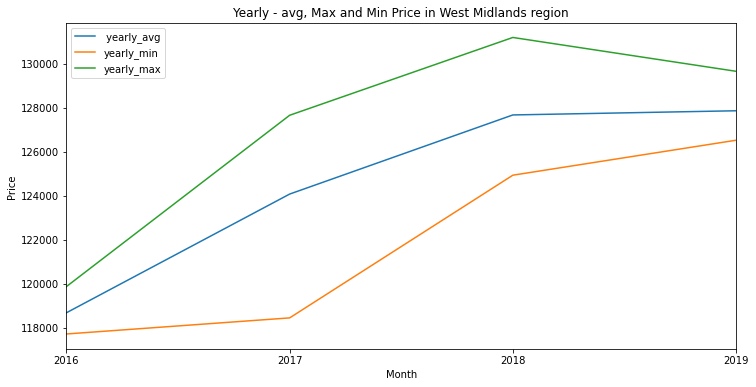

In [26]:
Yearly = Region_data1.loc[(Region_data1.Area=='West Midlands Region')]
Yearly = Yearly['Flat']

yearly_avg = Yearly.groupby(pd.Grouper(freq='Y')).mean()
yearly_min = Yearly.groupby(pd.Grouper(freq='Y')).min()
yearly_max = Yearly.groupby(pd.Grouper(freq='Y')).max()

a1 = yearly_avg.plot(ylabel='Price',title= 'Yearly - avg, Max and Min Price in West Midlands region',figsize=(12,6))
a2= yearly_min.plot()
yearly_max.plot()
a1.legend([' yearly_avg', 'yearly_min', 'yearly_max'])

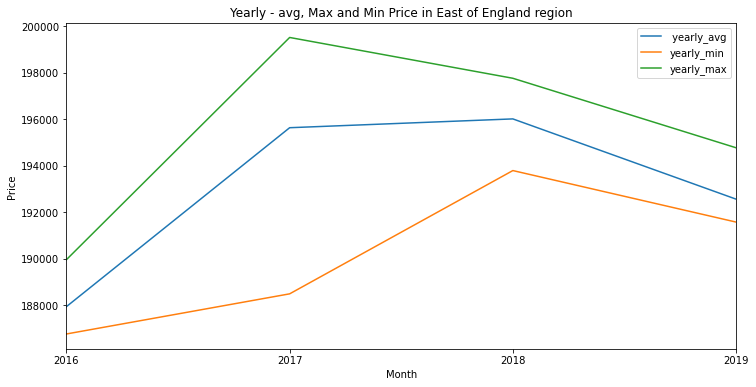

In [27]:
Yearly = Region_data1.loc[(Region_data1.Area=='East of England')]
Yearly = Yearly['Flat']

yearly_avg = Yearly.groupby(pd.Grouper(freq='Y')).mean()
yearly_min = Yearly.groupby(pd.Grouper(freq='Y')).min()
yearly_max = Yearly.groupby(pd.Grouper(freq='Y')).max()

a1 = yearly_avg.plot(ylabel='Price',title= 'Yearly - avg, Max and Min Price in East of England region',figsize=(12,6))
a2= yearly_min.plot()
yearly_max.plot()
a1.legend([' yearly_avg', 'yearly_min', 'yearly_max'])

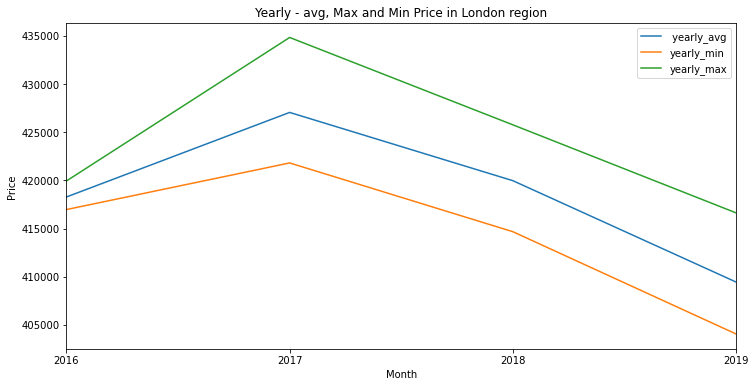

In [28]:
Yearly = Region_data1.loc[(Region_data1.Area=='London')]
Yearly = Yearly['Flat']

yearly_avg = Yearly.groupby(pd.Grouper(freq='Y')).mean()
yearly_min = Yearly.groupby(pd.Grouper(freq='Y')).min()
yearly_max = Yearly.groupby(pd.Grouper(freq='Y')).max()

a1 = yearly_avg.plot(ylabel='Price',title= 'Yearly - avg, Max and Min Price in London region',figsize=(12,6))
a2= yearly_min.plot()
yearly_max.plot()
a1.legend([' yearly_avg', 'yearly_min', 'yearly_max'])

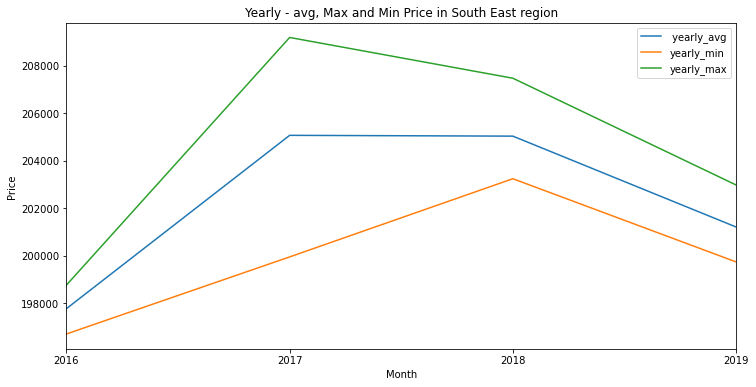

In [29]:
Yearly = Region_data1.loc[(Region_data1.Area=='South East')]
Yearly = Yearly['Flat']

yearly_avg = Yearly.groupby(pd.Grouper(freq='Y')).mean()
yearly_min = Yearly.groupby(pd.Grouper(freq='Y')).min()
yearly_max = Yearly.groupby(pd.Grouper(freq='Y')).max()

a1 = yearly_avg.plot(ylabel='Price',title= 'Yearly - avg, Max and Min Price in South East region',figsize=(12,6))
a2= yearly_min.plot()
yearly_max.plot()
a1.legend([' yearly_avg', 'yearly_min', 'yearly_max'])

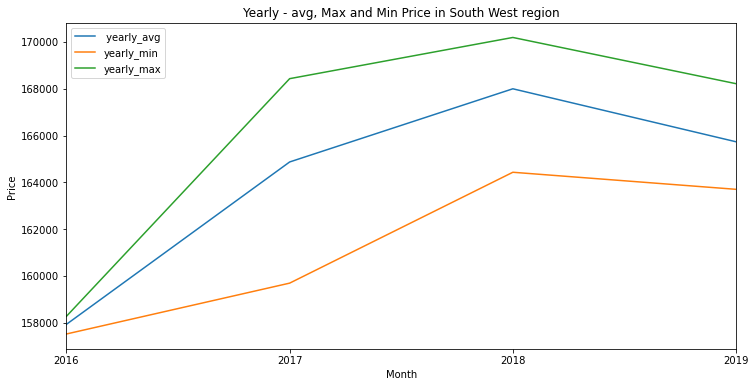

In [30]:
Yearly = Region_data1.loc[(Region_data1.Area=='South West')]
Yearly = Yearly['Flat']

yearly_avg = Yearly.groupby(pd.Grouper(freq='Y')).mean()
yearly_min = Yearly.groupby(pd.Grouper(freq='Y')).min()
yearly_max = Yearly.groupby(pd.Grouper(freq='Y')).max()

a1 = yearly_avg.plot(ylabel='Price',title= 'Yearly - avg, Max and Min Price in South West region',figsize=(12,6))
a2= yearly_min.plot()
yearly_max.plot()
a1.legend([' yearly_avg', 'yearly_min', 'yearly_max'])

### Comments

London is the most costly region among all regions. Flat prices fell down in london region only among all regions. It means people prefer to live in detached type property in london region as compared to flat type property. Whereas flat property prices observed a growth in price in other regions except London. Secondly, North East is the most affordable and cheapest region to live.

North West,East midlands and West midlands has highest percentage of price growth for flat and detached property among all other regions. Percentage of price growth recorded high in detached type property than flat type. Detached property are also costlier than flat type property in all regions. 

flat and detached type property has highest price in London region. For detached & flat type property, North East region is the cheapest option to live in terms of price.

## Part 3 - Price Change

### Part 3.1 - Computing change in flat prices (July 2017 & July 2018)

Using Area data, Calculating change in price 

In [31]:
# Dropping column that are not required
Area_data2 = New_Area_data.drop(['Code','Detached','Semi','Terraced','AuthorityName','RegionCode'],axis=1)

# Creating 'Area' as an index
Area_data3 = Area_data2.set_index(keys='Area')

# Filtering 'July2017' and extracting data
July2017 = Area_data3.loc[Area_data3.Date.str.startswith('01/07/2017')]


# Adding 'July2017' column & dropping 'Date & Flat columns'
July_2017 = July2017.assign(July2017=(July2017.Flat)).drop(['Date','Flat'],axis=1)


# Filtering 'July2018' and extracting data
July_2018 = Area_data3.loc[Area_data3.Date.str.startswith('01/07/2018')]

# Adding 'July201'8 column
Prices = July_2017.assign(July2018=(July_2018.Flat))

#  Adding 'ChangeinPrice' column
Change_price = Prices.assign(ChangeinPrice=(Prices.July2018 - Prices.July2017))
Change_price

,RegionName,July2017,July2018,ChangeinPrice
Area,,,,
Hartlepool,North East,65007.84170,61116.82158,-3891.02012
Middlesbrough,North East,69163.06963,69313.90788,150.83825
Redcar and Cleveland,North East,65507.80990,64802.79724,-705.01266
Stockton-on-Tees,North East,83599.32806,83654.55272,55.22466
Darlington,North East,87041.37973,83679.31818,-3362.06155
...,...,...,...,...
Suffolk,East of England,140278.18370,142488.46480,2210.28110
Surrey,South East,270116.52610,267144.69100,-2971.83510
Warwickshire,West Midlands,165676.94800,167470.71860,1793.77060


### Part 3.2 -  Visualize the change in area prices in each region

### Change in price - North East region

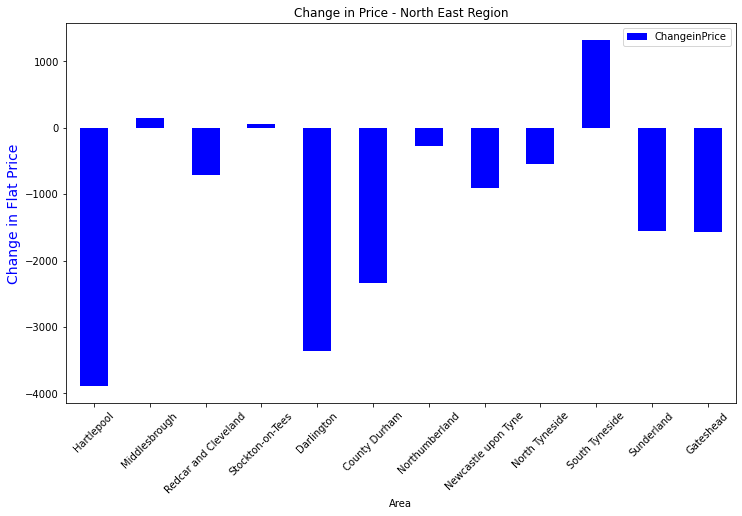

In [32]:
North_East = Change_price.loc[(Change_price.RegionName=='North East')]
a1 = North_East.plot.bar(y='ChangeinPrice',color='blue',figsize=(12,7))
a1.set_title('Change in Price - North East Region')
a1.set_ylabel('Change in Flat Price', fontsize=14, color='b')
a1.tick_params(axis='x', labelrotation= 45)

As shown in above trend, Hartlepool area is having maximum drop in change price whereas South Tyneside area is recorded highest growth in change price for Flat type property. Sunderland and Gateshead observed almost same fallover in change price. Only 3 nos areas are having increase in change price rest 9 areas are recorded fall in change prices.

### Change in price - North West region

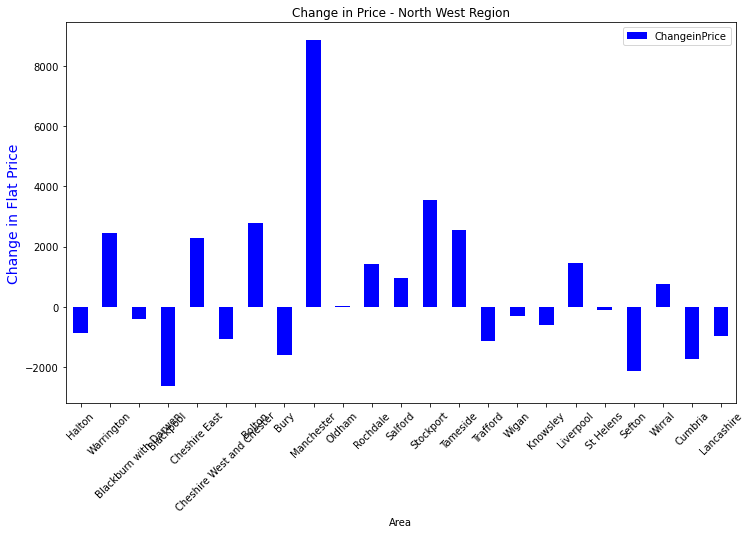

In [33]:
North_East = Change_price.loc[(Change_price.RegionName=='North West')]
a1 = North_East.plot.bar(y='ChangeinPrice',color='blue',figsize=(12,7))
a1.set_title('Change in Price - North West Region')
a1.set_ylabel('Change in Flat Price', fontsize=14, color='b')
a1.tick_params(axis='x', labelrotation= 45)

 - Blackburn with Darwen experienced highest drop in change price whereas Manchester recorded maximum rise in change price. 12 areas found decrease in change prices and rest 11 areas experienced rise in change prices.

### Change in Price - Yorkshire and The Humber Region

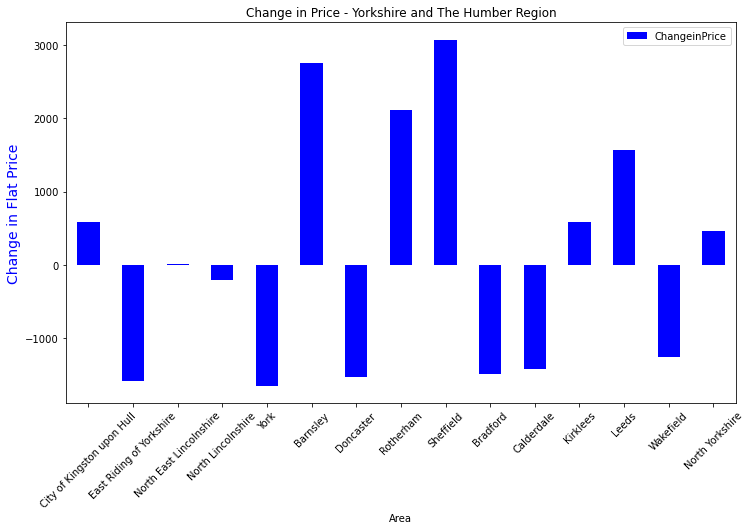

In [34]:
North_East = Change_price.loc[(Change_price.RegionName=='Yorkshire and The Humber')]
a1 = North_East.plot.bar(y='ChangeinPrice',color='blue',figsize=(12,7))
a1.set_title('Change in Price - Yorkshire and The Humber Region')
a1.set_ylabel('Change in Flat Price', fontsize=14, color='b')
a1.tick_params(axis='x', labelrotation= 45)

- York area experienced highest drop in change price whereas Sheffield recorded maximum rise in change price. Out of 15 areas, 8 areas observed increase in change price and rest 7 other areas experienced decrease in change price.

### Change in Price - East Midlands Region

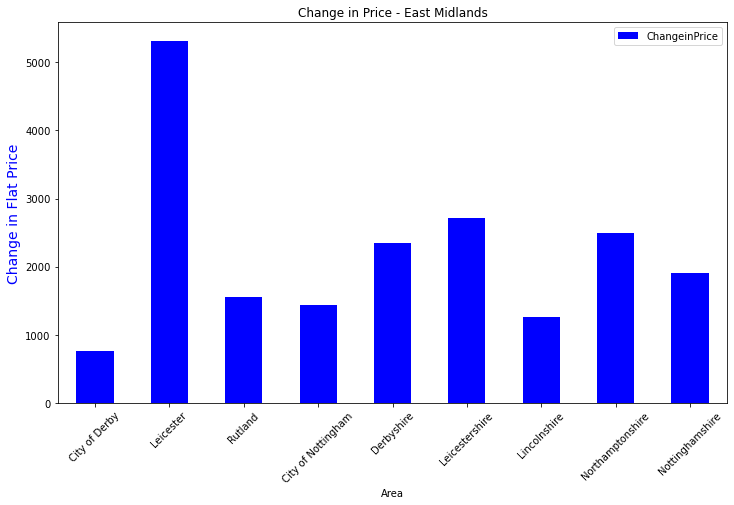

In [35]:
North_East = Change_price.loc[(Change_price.RegionName=='East Midlands')]
a1 = North_East.plot.bar(y='ChangeinPrice',color='blue',figsize=(12,7))
a1.set_title('Change in Price - East Midlands')
a1.set_ylabel('Change in Flat Price', fontsize=14, color='b')
a1.tick_params(axis='x', labelrotation= 45)

- City of derby experienced highest drop in change price whereas Leicester recorded maximum rise in change price. Out of 9 areas, All areas observed increase in change price and no area is having fall in change price.

### Change in Price - West Midlands Region

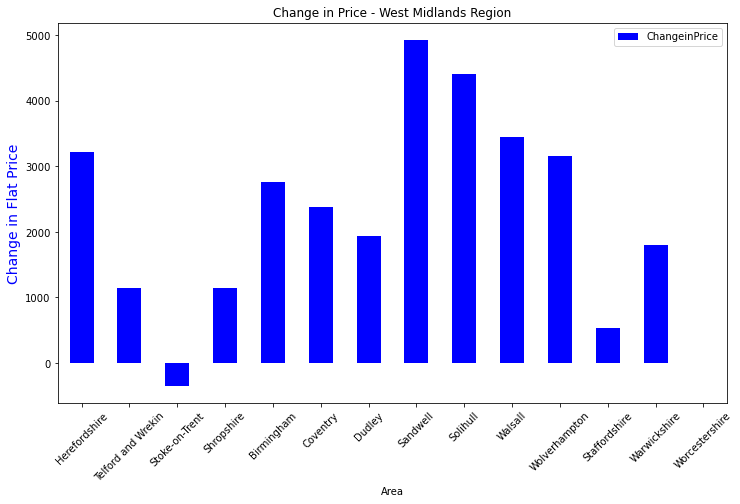

In [36]:
North_East = Change_price.loc[(Change_price.RegionName=='West Midlands')]
a1 = North_East.plot.bar(y='ChangeinPrice',color='blue',figsize=(12,7))
a1.set_title('Change in Price - West Midlands Region')
a1.set_ylabel('Change in Flat Price', fontsize=14, color='b')
a1.tick_params(axis='x', labelrotation= 45)

- Stoke-on-Trent experienced highest drop in change price whereas Sandwell recorded maximum rise in change price. Out of 14 areas, 12 areas observed increase in change price and rest 2 other areas experienced decrease in change price.

### Change in Price - South West Region

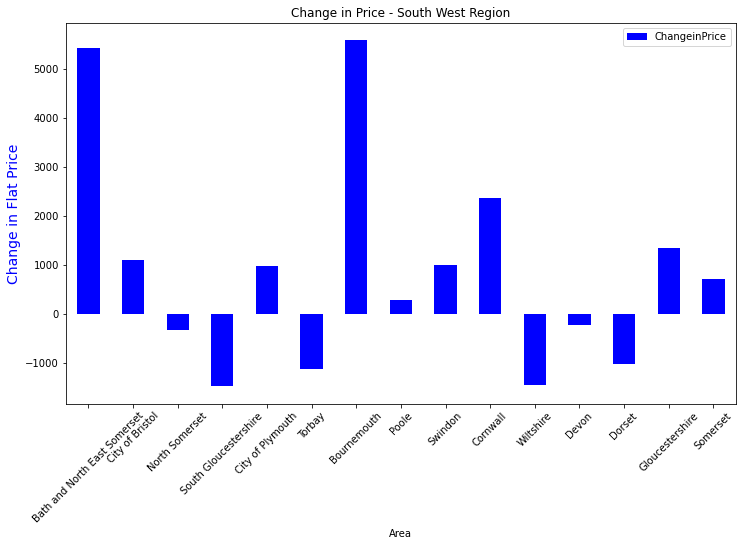

In [37]:
North_East = Change_price.loc[(Change_price.RegionName=='South West')]
a1 = North_East.plot.bar(y='ChangeinPrice',color='blue',figsize=(12,7))
a1.set_title('Change in Price - South West Region')
a1.set_ylabel('Change in Flat Price', fontsize=14, color='b')
a1.tick_params(axis='x', labelrotation= 45)

- South Gloucestershire experienced highest drop in change price whereas Bournemouth recorded maximum rise in change price. Out of 15 areas, 9 areas observed increase in change price and rest 6 other areas experienced decrease in change price.

### Change in Price - East of England Region

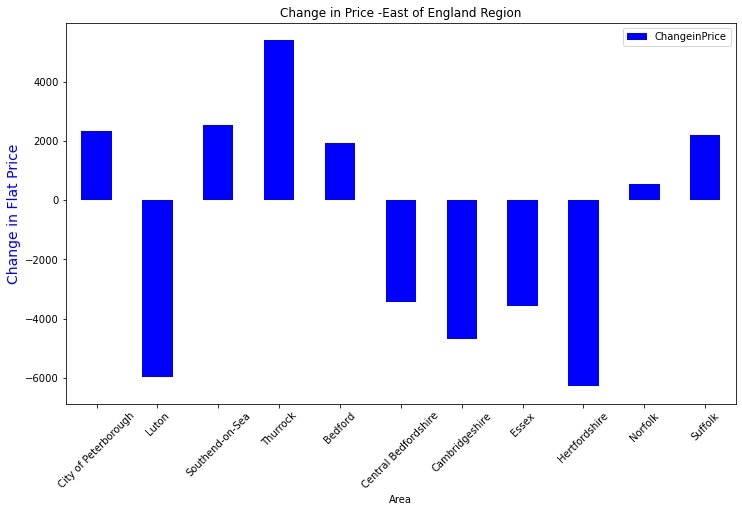

In [38]:
North_East = Change_price.loc[(Change_price.RegionName=='East of England')]
a1 = North_East.plot.bar(y='ChangeinPrice',color='blue',figsize=(12,7))
a1.set_title('Change in Price -East of England Region')
a1.set_ylabel('Change in Flat Price', fontsize=14, color='b')
a1.tick_params(axis='x', labelrotation= 45)

- Hertfordshire experienced highest drop in change price whereas Thurrock recorded maximum rise in change price. Out of 11 areas, 6 areas observed increase in change price and rest 5 other areas experienced decrease in change price.

### Change in Price - South East Region

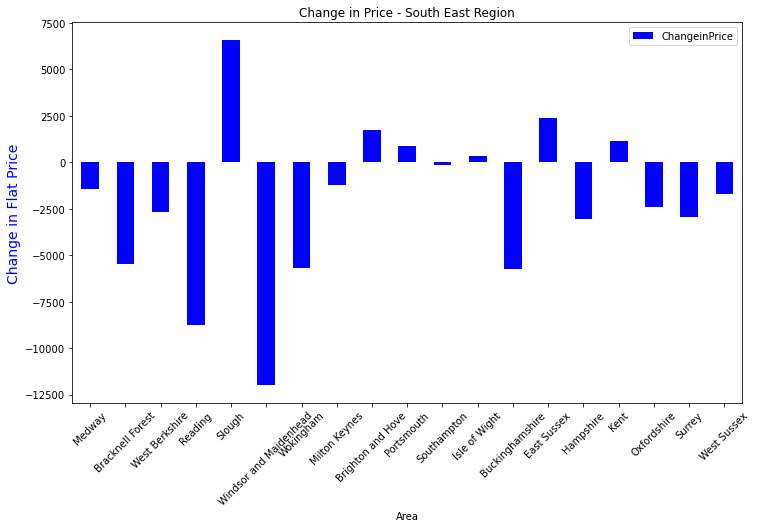

In [39]:
North_East = Change_price.loc[(Change_price.RegionName=='South East')]
a1 = North_East.plot.bar(y='ChangeinPrice',color='blue',figsize=(12,7))
a1.set_title('Change in Price - South East Region')
a1.set_ylabel('Change in Flat Price', fontsize=14, color='b')
a1.tick_params(axis='x', labelrotation= 45)

- Windor and Maidenhead experienced highest drop in change price whereas Slough recorded maximum rise in change price. Out of 19 areas, 6 areas observed increase in change price and rest 13 other areas experienced decrease in change price.

### Change in Price - London Region

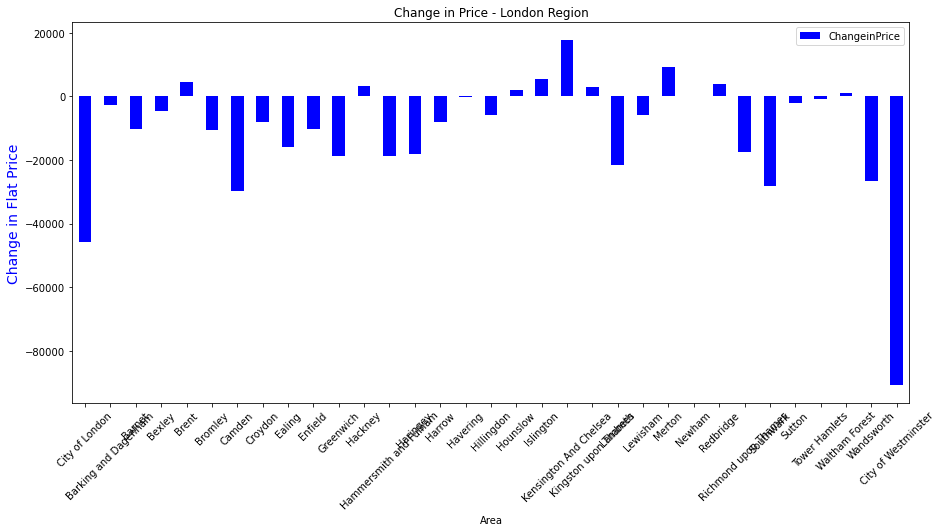

In [40]:
North_East = Change_price.loc[(Change_price.RegionName=='London')]
a1 = North_East.plot.bar(y='ChangeinPrice',color='blue',figsize=(15,7))
a1.set_title('Change in Price - London Region')
a1.set_ylabel('Change in Flat Price', fontsize=14, color='b')
a1.tick_params(axis='x', labelrotation= 45)

- City of westminster experienced highest drop in change price whereas Kensington and Chelsea recorded maximum rise in change price. Out of 33 areas, 10 areas observed increase in change price and rest 23 other areas experienced decrease in change price.

## Part 4 - Statistical Analysis

### Part 4.1 - Area Prices (Increasing / Decreasing)

In [41]:
# Categorised areas in terms of price increased or decreased.

def Category(row):
    if (row.ChangeinPrice > 0) : return 'Increase'
    if (row.ChangeinPrice < 0) : return 'Decrease'
    if (row.ChangeinPrice == 0) : return 'Not affected'

# add a column name 'Change' by using assign.
Classification = Change_price.assign(Change = Change_price.apply(Category, axis=1))
Classification

,RegionName,July2017,July2018,ChangeinPrice,Change
Area,,,,,
Hartlepool,North East,65007.84170,61116.82158,-3891.02012,Decrease
Middlesbrough,North East,69163.06963,69313.90788,150.83825,Increase
Redcar and Cleveland,North East,65507.80990,64802.79724,-705.01266,Decrease
Stockton-on-Tees,North East,83599.32806,83654.55272,55.22466,Increase
Darlington,North East,87041.37973,83679.31818,-3362.06155,Decrease
...,...,...,...,...,...
Suffolk,East of England,140278.18370,142488.46480,2210.28110,Increase
Surrey,South East,270116.52610,267144.69100,-2971.83510,Decrease
Warwickshire,West Midlands,165676.94800,167470.71860,1793.77060,Increase


### Part 4.2 Cross-tabulate the number of areas 

In [42]:
# Cross-tabulation method
Number_of_Areas = pd.crosstab(Classification.Change, Classification.RegionName)
Number_of_Areas

RegionName,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


### Part 4.3 Chi-sqaure test

In [43]:
# Chi-square using chi2_contigency

test_stat, p_value, dof, expected = stats.chi2_contingency(Number_of_Areas, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))

There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.056 %


### Part 4.4 Interpretation of results

A chi-square test is a statistical test used to compare observed results with expected results. The purpose of this test is to determine if a difference between observed data and expected data is due to chance or if it is due to a relationship between the variables 

After performing the test, p value is greater than the 0.05, hence we fail to reject the null hypothesis. Evidence are not strong enough, we can also conclude that change in price are affected by the regions.

Chi-square helps in comparing whether two variables in a contingency table is correlated or not. From Chi-square test, we can determine the degree of fitness between observed and expected distribution of data. The Chi-Square Test of Independence can only compare categorical variables. 

It cannot make comparisons between continuous variables or between categorical and continuous variables. However, Chi square test not able to determine the causal relationship between two variables.